In [66]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/iris-data.csv")
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
data.shape

(150, 5)

In [72]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
data.tail()

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [78]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [80]:
data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [82]:
X = data.drop(['class'], axis=1)
y = data.drop(['sepal length',  'sepal width',  'petal length',  'petal width'], axis=1)
print(X)
print(y)
print(X.shape)
print(y.shape)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
              class
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]
(150, 4)
(150, 1

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


In [86]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [88]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.9666666666666667

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [92]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[11  0  0]
 [ 0  9  0]
 [ 0  1  9]]


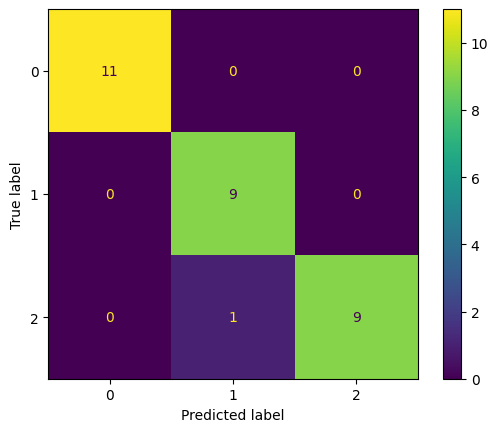

In [94]:
disp.plot()
plt.show()

In [96]:
def get_confusion_matrix_values(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

TP, FP, FN, TN = get_confusion_matrix_values(y_test, y_pred)
print("TP: ", TP)
print("FP: ", FP)
print("FN: ", FN)
print("TN: ", TN)

TP:  11
FP:  0
FN:  0
TN:  9


In [98]:
print("The Accuracy is ", (TP+TN)/(TP+TN+FP+FN))
print("The error_rate is", 1 - ((TP+TN)/(TP+TN+FP+FN)))
print("The precision is ", TP/(TP+FP))
print("The recall is ", TP/(TP+FN))

The Accuracy is  1.0
The error_rate is 0.0
The precision is  1.0
The recall is  1.0


In [100]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Check column names
print(data.columns)

# If 'MEDV' doesn't exist, drop columns that are not numeric
X = data.select_dtypes(include=["float64", "int64"])  # Select only numeric columns

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)
X_minmax_data = pd.DataFrame(X_minmax, columns=X.columns)
print("Min-Max Scaled Data (0-1 Range):")
print(X_minmax_data.head())

# Standard Scaling
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X)
X_standard_data = pd.DataFrame(X_standard, columns=X.columns)
print("\nStandard Scaled Data (Z-score):")
print(X_standard_data.head())


Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')
Min-Max Scaled Data (0-1 Range):
   sepal length  sepal width  petal length  petal width
0      0.222222     0.625000      0.067797     0.041667
1      0.166667     0.416667      0.067797     0.041667
2      0.111111     0.500000      0.050847     0.041667
3      0.083333     0.458333      0.084746     0.041667
4      0.194444     0.666667      0.067797     0.041667

Standard Scaled Data (Z-score):
   sepal length  sepal width  petal length  petal width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977


In [102]:
import numpy as np
# Calculate Z-scores for each feature
from scipy.stats import zscore

# Apply Z-score to each column
z_scores = np.abs(zscore(X))
outliers_zscore = (z_scores > 3).sum(axis=0)

# Calculate IQR for each feature
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Outliers are those outside the IQR range
outliers_iqr = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).sum(axis=0)

# Display the results
outliers_zscore, outliers_iqr


(sepal length    0
 sepal width     1
 petal length    0
 petal width     0
 dtype: int64,
 sepal length    0
 sepal width     4
 petal length    0
 petal width     0
 dtype: int64)

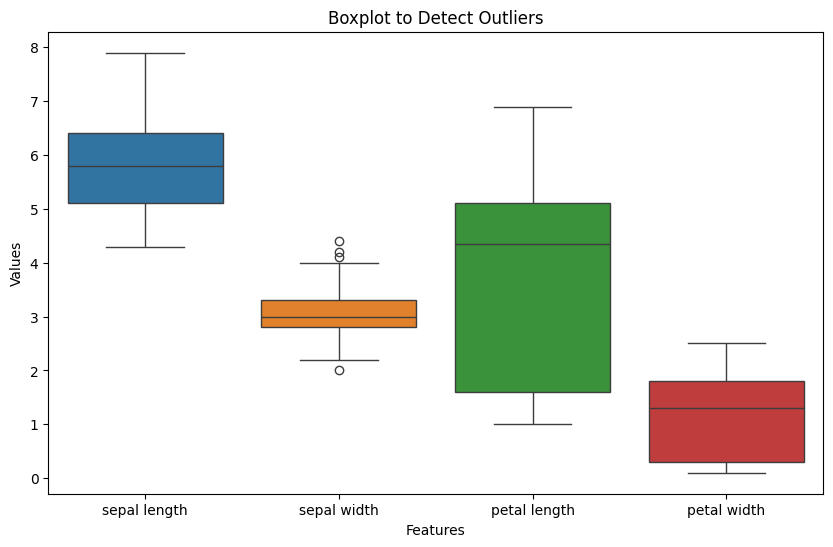

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded the Iris dataset and are using the 'X' dataframe for features
# Plotting boxplot to detect outliers
plt.figure(figsize=(10, 6))

# Create boxplot for all numerical features in the dataset
sns.boxplot(data=X)
plt.title("Boxplot to Detect Outliers")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()
